In [628]:
import os
os.chdir('../')
from python_code import gibbs_sampler as gs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
from scipy.stats import t
from scipy import stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [45]:
df = pd.read_csv('../data/bloodpressure.csv')
df.columns = ['date', 'values', 'group', 'treatment']
df['date'] = pd.to_datetime(df['date'])

In [46]:
group_1 = df[df['treatment'] == 1]['values']
group_2 = df[df['treatment'] == 2]['values']

In [47]:
alpha = 0.05
s_squared = ((len(group_1)-1)*group_1.var() + (len(group_2)-1) * group_2.var())/(len(group_1)+len(group_2)-2)
dist = t(loc=0, scale=np.sqrt(s_squared)*np.sqrt(1/len(group_1) + 1/len(group_2)), df=len(group_1)+len(group_2)-2)

In [48]:
np.sqrt(s_squared/len(group_1) + s_squared/len(group_2))

1.0018725995897495

In [49]:
p_value = dist.cdf(group_2.mean() - group_1.mean())*2
p_value

2.29735313852906e-19

In [50]:
stats.ttest_ind(group_1, group_2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=9.451231419610627, pvalue=2.29735313852906e-19)

In [51]:
stats.ttest_ind(group_1, group_2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=9.451231419610627, pvalue=2.29735313852906e-19)

In [52]:
new_group_1 = df[df['treatment'] == 1].groupby('group')['values'].mean()
new_group_2 = df[df['treatment'] == 2].groupby('group')['values'].mean()

In [53]:
s_squared = ((len(new_group_1)-1)*new_group_1.var() + (len(new_group_2)-1) * new_group_2.var())/(len(new_group_1)+len(new_group_2)-2)
np.sqrt(s_squared)*np.sqrt(1/len(new_group_1) + 1/len(new_group_2))

4.5117616198060375

In [54]:
stats.ttest_ind(new_group_1, new_group_2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=1.6436975906457643, pvalue=0.11850759018407284)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 879.56it/s]


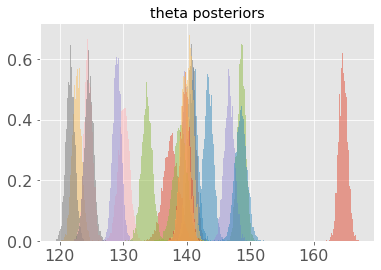

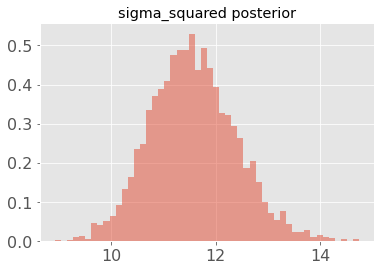

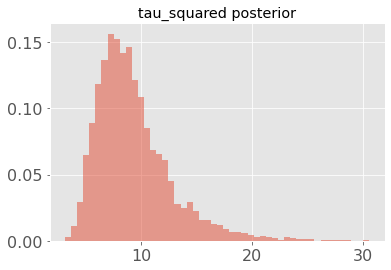

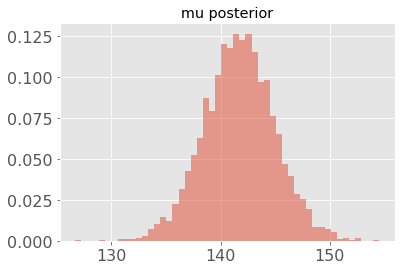

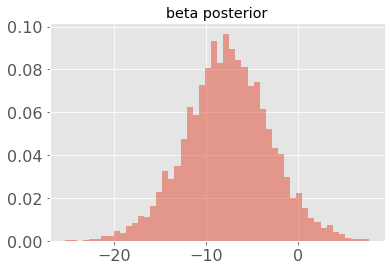

<Figure size 432x288 with 0 Axes>

In [55]:
gibbs = gs.GibbsSamplerBeta(df, n_iter=5000, burn=200, beta=0)
gibbs.fit()
gibbs.plot_all_posteriors();

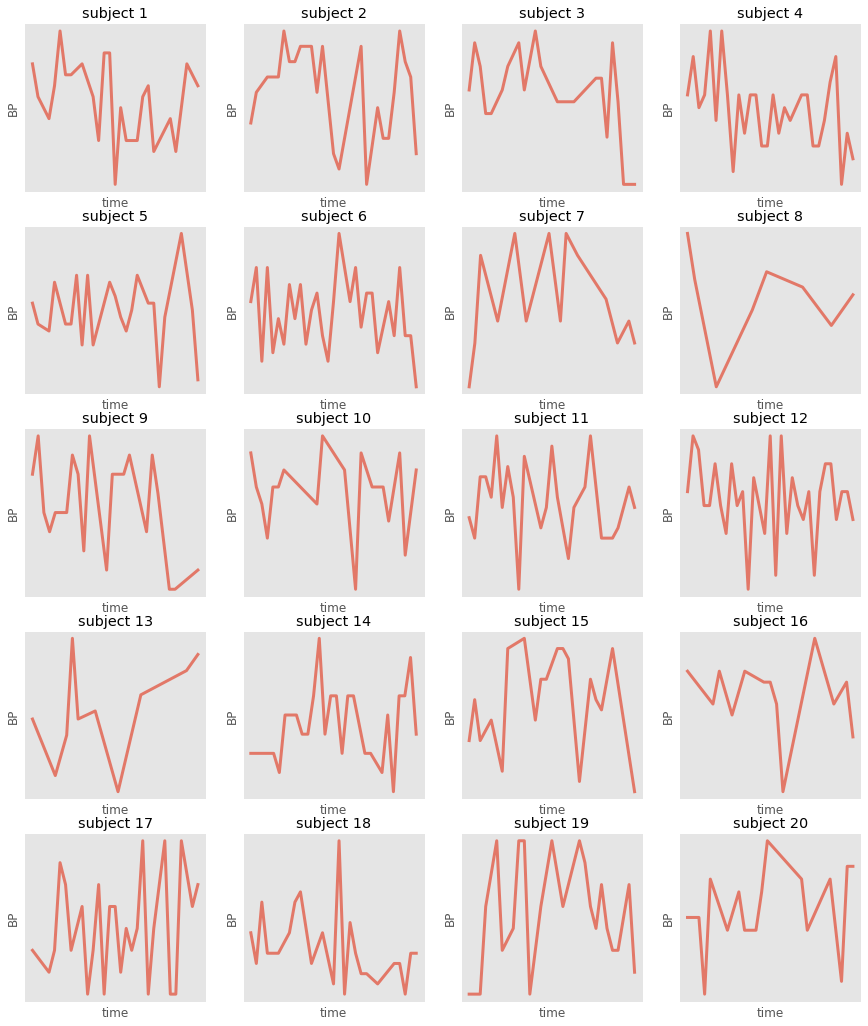

In [77]:
plt.rcParams['figure.figsize'] = 15, 18
group_dicts = df.groupby('group').groups
for i in range(20):
    plt.subplot(5,4, i+1)
    df_to_plot = df.loc[group_dicts[i+1]]
    plt.plot(df_to_plot['date'], df_to_plot['values'], lw=3, alpha=.7)   
    plt.xticks([])
    plt.yticks([])
    plt.title(f'subject {i+1}')
    plt.ylabel('BP')
    plt.xlabel('time')


plt.rcParams['figure.figsize'] = 6, 4


In [876]:
def calculate_autocorrelation(values):
    mean = values.mean()
    denominator = np.sum((values-mean)**2)
    return [1.0] + [np.sum((values[j:]-mean) * (values[:-j]-mean)) / denominator for j in range(1, len(values))]

In [877]:
x = np.linspace(0,10,11)
y = np.sin(2*np.pi/5*x)

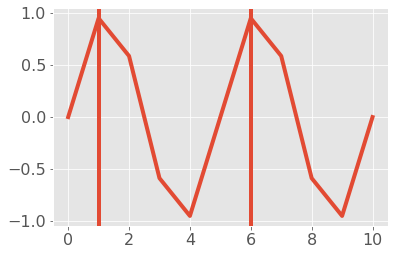

In [878]:
plt.plot(x, y);
plt.axvline(x=1);
plt.axvline(x=6);

In [879]:
y[0], y[5]

(0.0, -2.4492935982947064e-16)

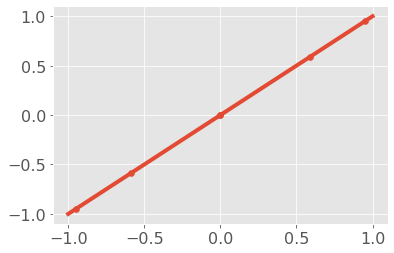

In [880]:
plt.scatter(y[5:],y[:-5])
plt.plot([-1,1], [-1,1])

In [881]:
#calculate_autocorrelation(df.loc[group_dicts[i+1]]['date'].to_numpy(), df.loc[group_dicts[i+1]]['values'].to_numpy())

In [882]:
significance = 1.96/np.sqrt(len(x))

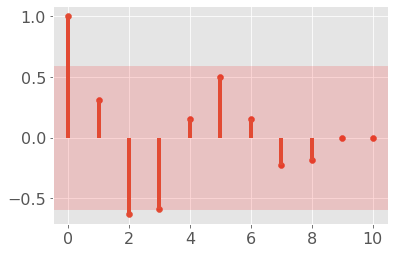

In [883]:
n = 1000
corrs = calculate_autocorrelation(y)
plt.scatter(x, corrs)
plt.vlines(x, 0, corrs)
#plt.ylim(-1.2,1.2);
plt.axhspan(-significance, significance, alpha=0.15, color='red');#plt.plot(lags, -significance);

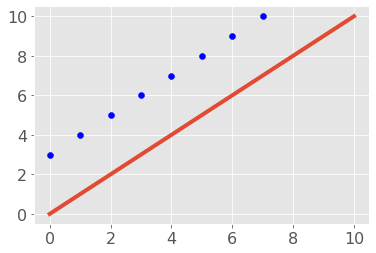

In [884]:
plt.scatter(x[:-3], x[3:],c='b')
plt.plot([0,10], [0, 10])

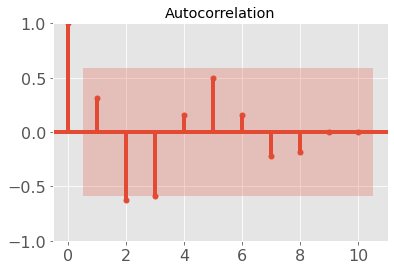

In [885]:
plot_acf(y, bartlett_confint=False);

In [886]:
len(y)

11